# Forced harmonic oscillator and the beat phenomenon

Let's consider a harmonic oscillator with an external *periodic* force: 
$$
y'' + \omega^2 y = K\cos(\alpha t)
$$
For $\alpha \neq \omega$ (say $\alpha <\omega$), the general solution is:
$$
y(t) = C_1\cos(\omega t) + C_2 \sin(\omega t) + \frac{K}{\omega^2-\alpha^2} \cos(\alpha t)
$$

For the sake of simplicity, let's assume that the initial conditions are 
$$
y(0)= 0 \qquad y'(0) = 0
$$
i.e. the system is at rest at time $t=0$.

In this case, the solution is simply
$$
y(t) =  \frac{K}{\omega^2-\alpha^2}\left[  \cos(\alpha t) - \cos(\omega t) \right] = \frac{2K}{\omega^2-\alpha^2}\sin\left(\frac{\omega+\alpha}{2}t\right)\sin\left(\frac{\omega-\alpha}{2}t\right)
$$
and it shows something called the *beat phenomenon*: 

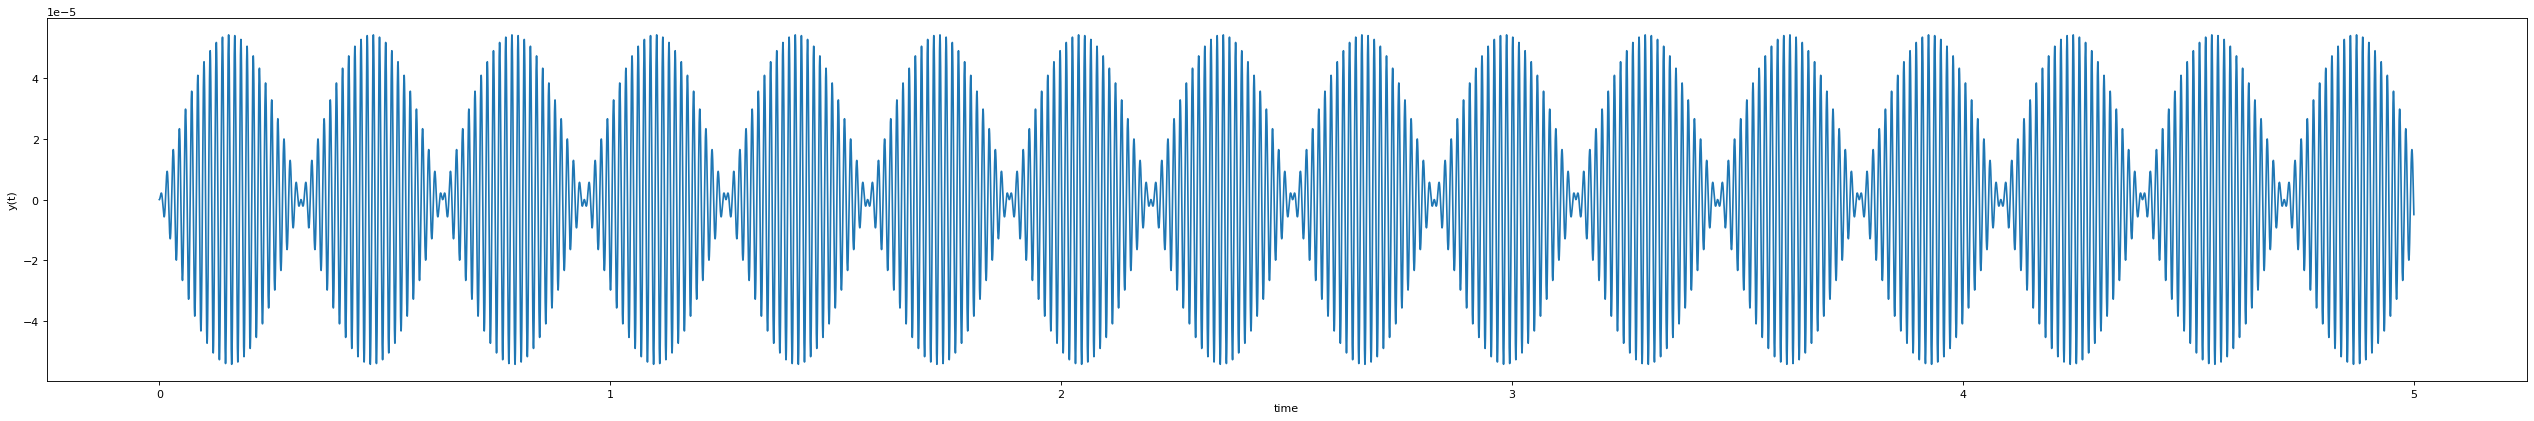

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

T = 5 ## final time T
K = 1 ## amplitude
w = 470 ## internal frequency
a = 450 ## external frequency

w_M = (w+a)/2
delta = (w-a)/2

tspan = np.linspace(0, T, 100000)
ysol = K/(w**2-a**2)*np.sin(w_M*tspan)*np.sin(delta*tspan)


figure(figsize=(40, 6), dpi=80)
plt.plot(tspan,ysol)
plt.xlabel('time')
plt.ylabel('y(t)')

plt.show()


We can also "listen" to the beats:

In [2]:
from IPython.display import Audio

Audio(ysol, rate=20000)

Using Python widgets, we can see how the solution varies depending on how close/far the values of the forcing frequency $\alpha$ and the internal frequency $\omega$ are

In [4]:
# Imports for JupyterLite
try:
    import piplite
    await piplite.install(['ipywidgets'])
except ImportError:
    pass

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [31]:
def beats(w, a):
    t = np.linspace(0, 2, num=100000)
    w_M = (w+a)/2
    delta = (w-a)/2
    
    figure(figsize=(20, 6), dpi=80)
    plt.plot(t, 2/(w**2-a**2)*np.sin(w_M*t)*np.sin(delta*t))
    plt.plot(t, 2/(w**2-a**2)*np.sin(delta*t),'k')
    plt.plot(t, -2/(w**2-a**2)*np.sin(delta*t),'k')
    plt.legend(['solution','envelope','envelope'])

    plt.show()



In [34]:
#interact(f, x=10);
interactive_plot = interactive(beats, w=(400, 500), a=(300, 450))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=450, description='w', max=500, min=400), IntSlider(value=375, descriptio…

In the case $\alpha=\omega$, the solution stops being bounded and it diverges as $t \to +\infty$:
$$
y(t) = C_1 \cos(\omega t) + C_2 \sin(\omega t)  + \frac{K}{2\omega}t\sin(\omega t)
$$
If we assume again as initial conditions $y(0)=0$ and $y'(0)=0$, we have
$$
y(t) = \frac{K}{2\omega}t\sin(\omega t)
$$

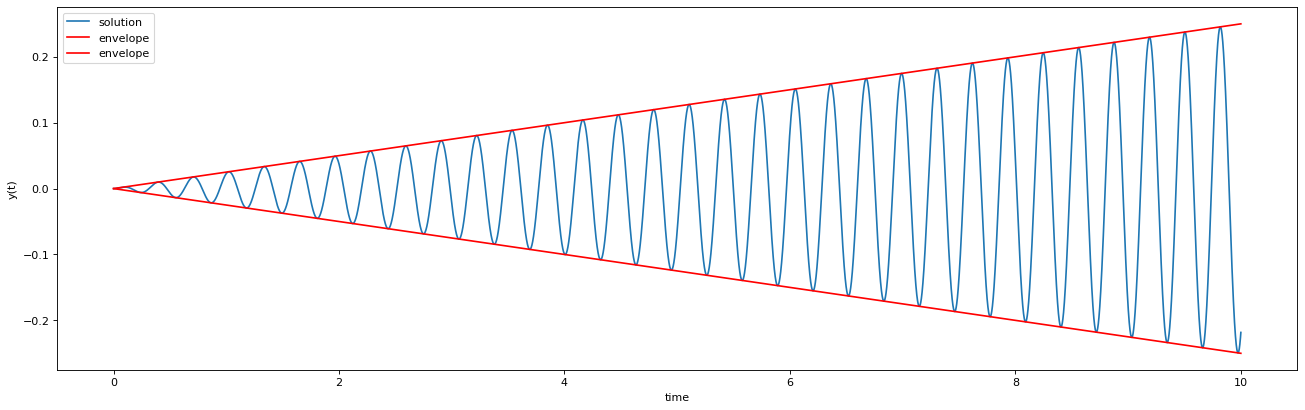

In [46]:
T = 10 ## final time T
K = 1 ## amplitude
w = 20 ## frequency

tspan = np.linspace(0, T, 100000)
ysol = K/(w*2)*tspan*np.sin(w*tspan)


figure(figsize=(20, 6), dpi=80)
plt.plot(tspan,ysol)
plt.plot(tspan, K/(2*w)*tspan, 'r')
plt.plot(tspan, -K/(2*w)*tspan, 'r')
plt.legend(['solution','envelope','envelope'])
plt.xlabel('time')
plt.ylabel('y(t)')

plt.show()
